In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pes-ec-mi-competition-b/sample_submission.csv
/kaggle/input/pes-ec-mi-competition-b/train.csv
/kaggle/input/pes-ec-mi-competition-b/test.csv


# Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


train_data = pd.read_csv('/kaggle/input/pes-ec-mi-competition-b/train.csv')
test_data = pd.read_csv('/kaggle/input/pes-ec-mi-competition-b/test.csv')

print(train_data.head())
print(test_data.head())



            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    pop.00072.5.wav   66149          0.464264         0.079744  0.228116   
1   jazz.00038.9.wav   66149          0.254604         0.090115  0.075960   
2  disco.00055.3.wav   66149          0.488070         0.065943  0.119709   
3   rock.00025.9.wav   66149          0.440747         0.071972  0.108535   
4   jazz.00013.4.wav   66149          0.369718         0.090648  0.052010   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.007791             2156.231325          333455.342337   
1  0.002236             1439.715643           68955.697954   
2  0.001558             2049.831819          132030.817465   
3  0.001491             2237.056815          129862.001264   
4  0.000124             1775.591113           66645.168399   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2295.327890           301528.295866  ...   36.512493   
1              1532.27

# Check for missing values

In [3]:
print(train_data.isnull().sum())

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

# Distribution of genres

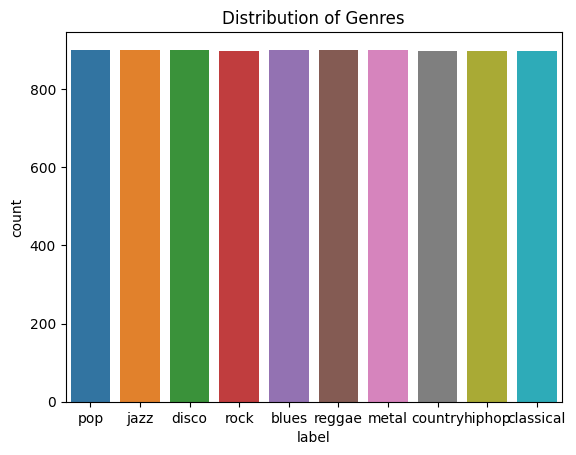

In [4]:
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Genres')
plt.show()

# Check for outliers using a boxplot for a subset of features

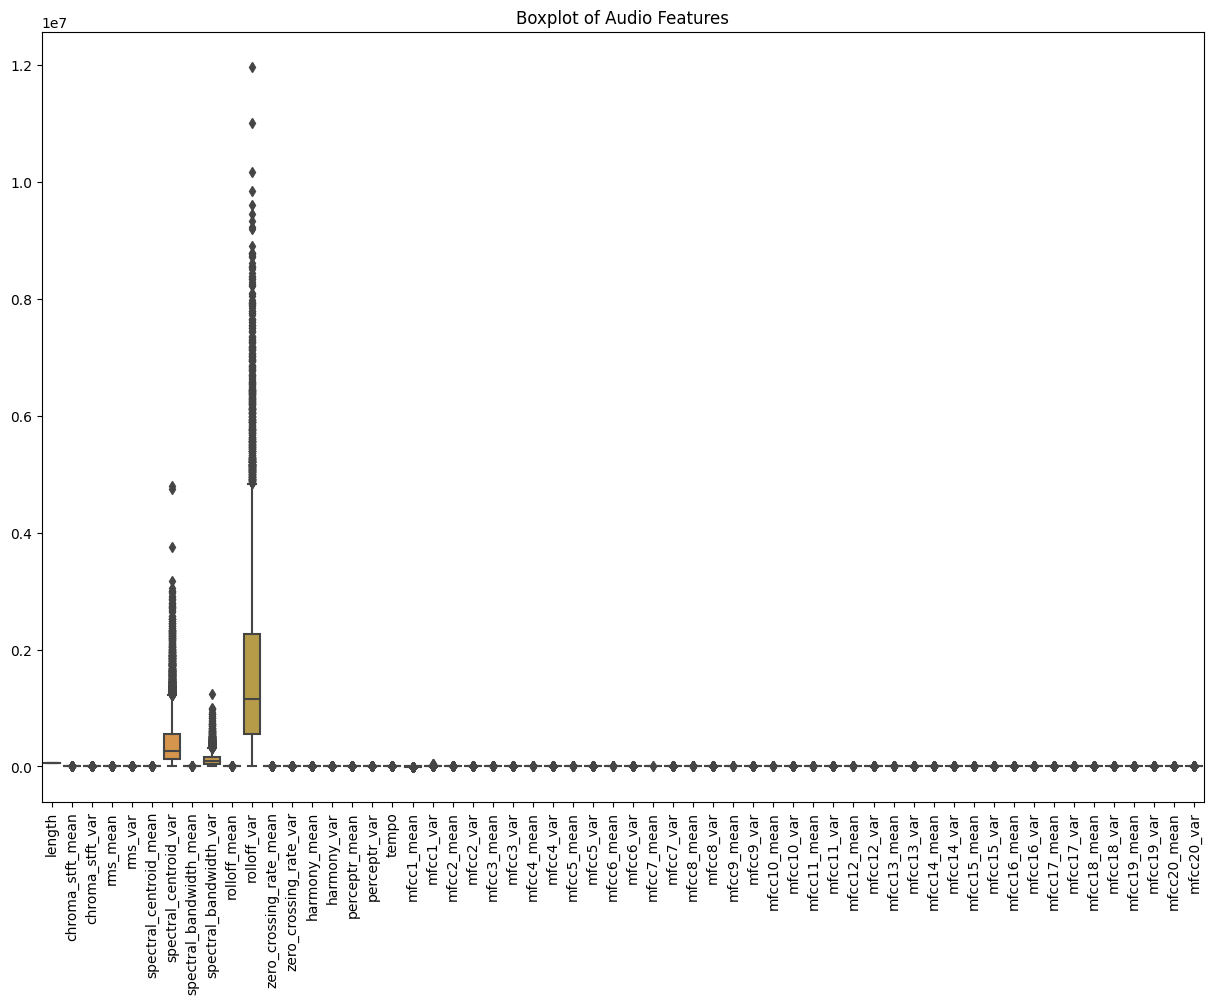

In [5]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data.iloc[:, 1:-1])  # Assuming the first column is ID and last column is label
plt.title('Boxplot of Audio Features')
plt.xticks(rotation=90)
plt.show()

# Normalize the features

In [6]:
scaler = StandardScaler()
features = train_data.columns[1:-1]  # This excludes the ID and label column
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

# Scaling the data

In [7]:
test_ids = test_data['id']
X_test = test_data.drop(columns=['id'])
X_test_scaled = scaler.transform(X_test)

# Preprocess the data: encode labels and scale features

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['label'])
X = train_data.drop(columns=['label', 'filename'])  # Assuming 'filename' is not a feature
y = train_data['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# HeatMap

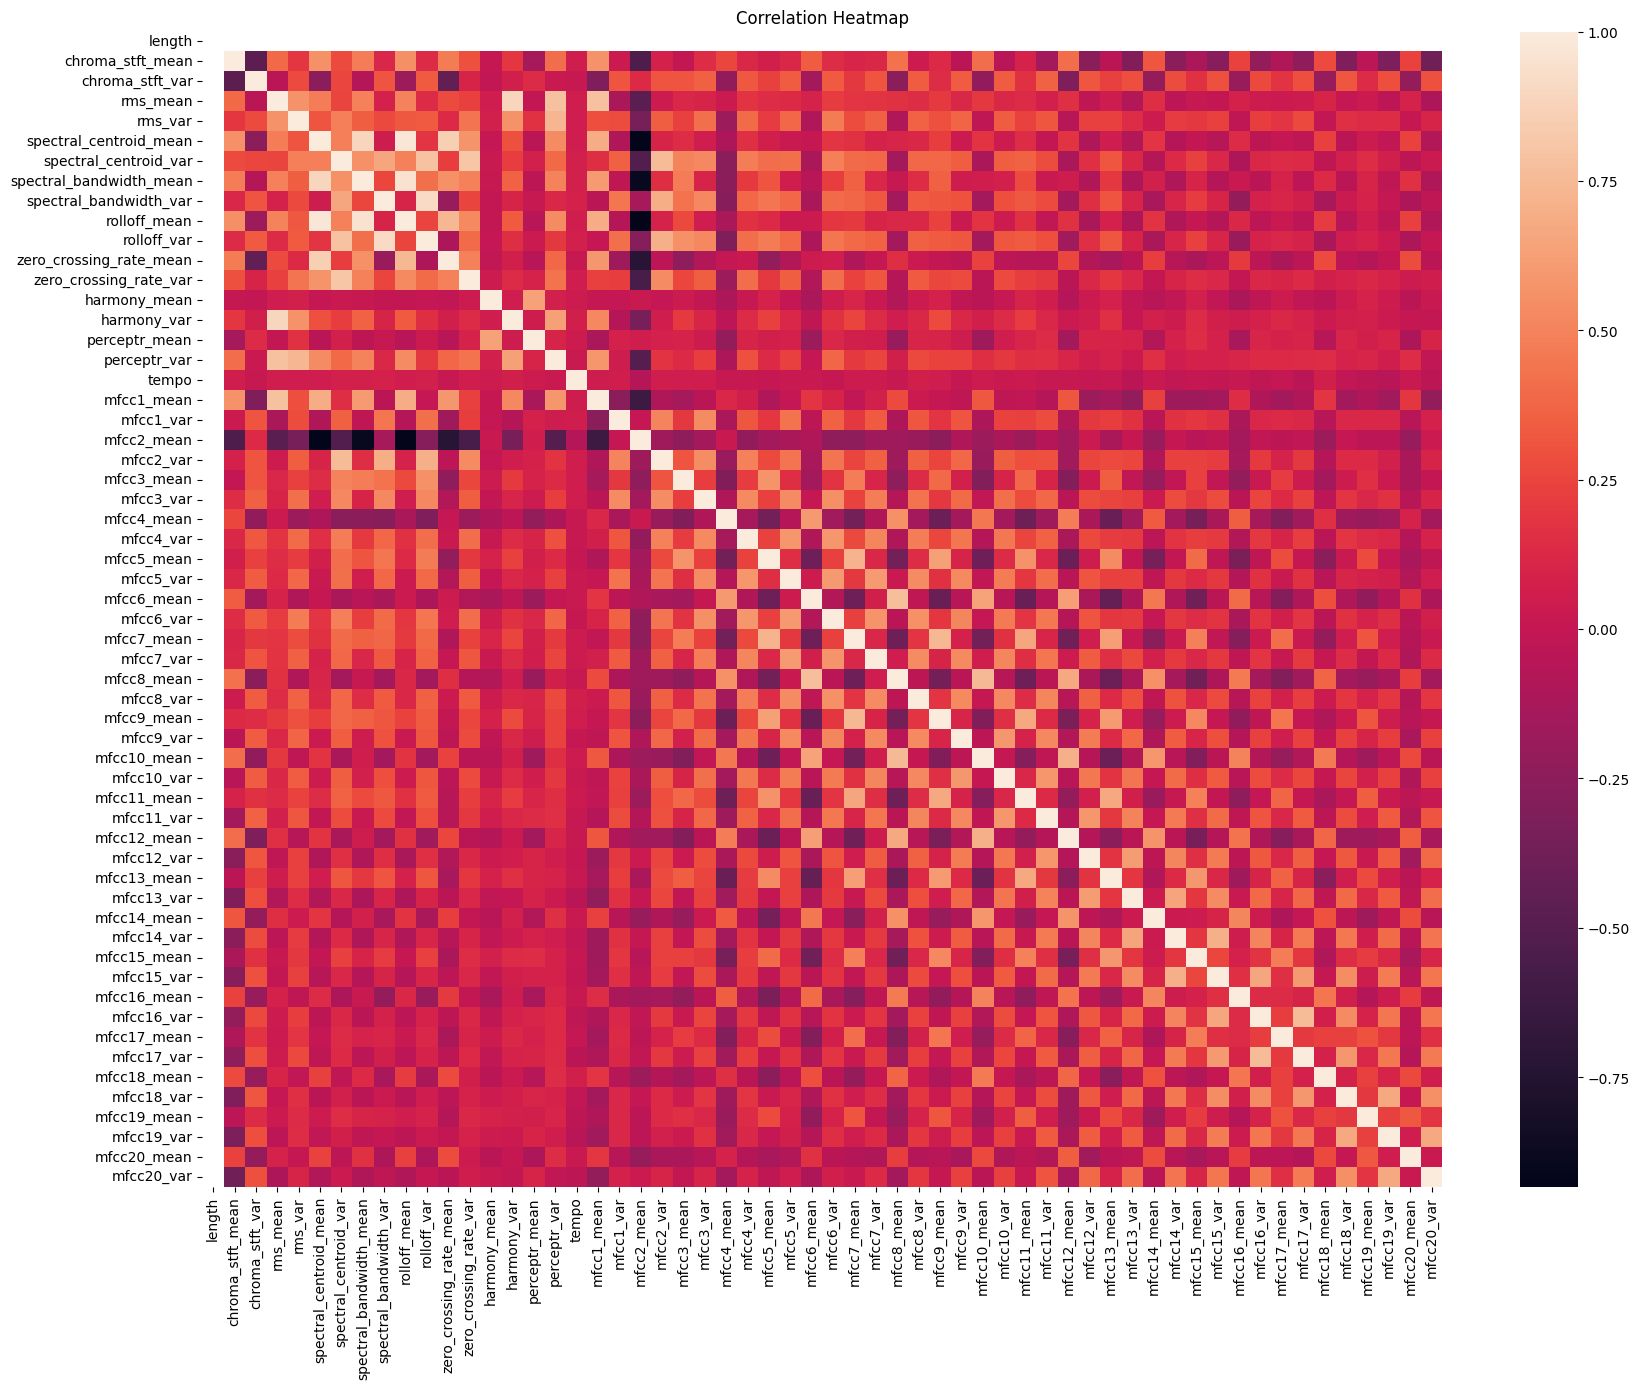

In [9]:
correlation_matrix = X_test.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix)
plt.title('Correlation Heatmap')
plt.show()


# Split the data into training and validation sets

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=25, random_state=42)


# Importing the necesesary libraries

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Artificial Neural Network with Adam optimiser

In [12]:
# Define the ANN architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.1),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with one neuron per class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,  # Reduced number of epochs for quicker training
                    batch_size=128,  # Increased batch size for stability
                    validation_data=(X_val, y_val),
                    verbose=1)

# Evaluate the model on the validation set
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/10
53/53 [==============================] - 1s 6ms/step - loss: 2.2151 - accuracy: 0.2592 - val_loss: 1.8176 - val_accuracy: 0.3594
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 1.6821 - accuracy: 0.3980 - val_loss: 1.5191 - val_accuracy: 0.4533
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 1.4603 - accuracy: 0.4762 - val_loss: 1.3552 - val_accuracy: 0.5178
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 1.3297 - accuracy: 0.5275 - val_loss: 1.2531 - val_accuracy: 0.5601
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 1.2478 - accuracy: 0.5573 - val_loss: 1.1796 - val_accuracy: 0.5859
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 1.1777 - accuracy: 0.5805 - val_loss: 1.1244 - val_accuracy: 0.6023
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 1.1273 - accuracy: 0.6048 - val_loss: 1.0820 - val_accuracy: 0.6201
Epoch 8/10
53/53 [==

# ANN with SGD

In [13]:
from tensorflow.keras.optimizers import SGD

# Compile with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_sgd = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_val, y_val),
                        verbose=1)

val_accuracy_sgd = history_sgd.history['val_accuracy'][-1]
print(f'SGD Validation Accuracy: {val_accuracy_sgd:.4f}')


Epoch 1/10
53/53 [==============================] - 1s 6ms/step - loss: 0.9788 - accuracy: 0.6629 - val_loss: 0.9564 - val_accuracy: 0.6681
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 0.9485 - accuracy: 0.6718 - val_loss: 0.9254 - val_accuracy: 0.6855
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 0.9151 - accuracy: 0.6866 - val_loss: 0.9050 - val_accuracy: 0.6904
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.8904 - accuracy: 0.6835 - val_loss: 0.8793 - val_accuracy: 0.6975
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 0.8671 - accuracy: 0.6991 - val_loss: 0.8636 - val_accuracy: 0.7109
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 0.8569 - accuracy: 0.7012 - val_loss: 0.8462 - val_accuracy: 0.7206
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.8301 - accuracy: 0.7101 - val_loss: 0.8328 - val_accuracy: 0.7135
Epoch 8/10
53/53 [==

# ANN with RMSProp

In [14]:
from tensorflow.keras.optimizers import RMSprop

# Compile with RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.0005, rho=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_rms = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_val, y_val),
                        verbose=1)

val_accuracy_rms = history_rms.history['val_accuracy'][-1]
print(f'RMSprop Validation Accuracy: {val_accuracy_rms:.4f}')


Epoch 1/10
53/53 [==============================] - 1s 5ms/step - loss: 0.7800 - accuracy: 0.7313 - val_loss: 0.7901 - val_accuracy: 0.7344
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.7255 - val_loss: 0.7865 - val_accuracy: 0.7389
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7700 - accuracy: 0.7317 - val_loss: 0.7843 - val_accuracy: 0.7415
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.7366 - val_loss: 0.7823 - val_accuracy: 0.7380
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7495 - accuracy: 0.7403 - val_loss: 0.7759 - val_accuracy: 0.7429
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7571 - accuracy: 0.7291 - val_loss: 0.7739 - val_accuracy: 0.7420
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.7384 - val_loss: 0.7706 - val_accuracy: 0.7442
Epoch 8/10
53/53 [==

# ANN with AdaDelta

In [15]:
"""from tensorflow.keras.optimizers import Adadelta

# Compile with Adadelta optimizer
model.compile(optimizer=Adadelta(learning_rate=1.0, rho=0.95),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_adadelta = model.fit(X_train, y_train,
                             epochs=50,
                             batch_size=128,
                             validation_data=(X_val, y_val),
                             verbose=1)

val_accuracy_adadelta = history_adadelta.history['val_accuracy'][-1]
print(f'Adadelta Validation Accuracy: {val_accuracy_adadelta:.4f}')
"""

"from tensorflow.keras.optimizers import Adadelta\n\n# Compile with Adadelta optimizer\nmodel.compile(optimizer=Adadelta(learning_rate=1.0, rho=0.95),\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\n# Train the model\nhistory_adadelta = model.fit(X_train, y_train,\n                             epochs=50,\n                             batch_size=128,\n                             validation_data=(X_val, y_val),\n                             verbose=1)\n\nval_accuracy_adadelta = history_adadelta.history['val_accuracy'][-1]\nprint(f'Adadelta Validation Accuracy: {val_accuracy_adadelta:.4f}')\n"

# k-NN 

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
p=1
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance',p=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f'k-NN Validation Accuracy: {accuracy_knn:.4f}')
knn_predictions = knn.predict(X_test)
print(knn_predictions)



k-NN Validation Accuracy: 0.9500
[9 6 7 2 0 2 6 4 3 8 3 7 6 9 9 6 1 9 5 2 3 1 3 2 4 5 4 8 8 8 1 4 5 1 3 5 3
 1 0 2 7 4 5 9 7 5 3 1 0 0 8 8 9 8 1 3 1 0 1 4 6 2 0 1 2 5 8 9 4 5 2 8 8 8
 0 0 3 7 1 3 0 7 7 0 3 8 4 4 2 8 2 2 6 9 4 9 3 0 0 4 5 8 3 6 1 2 0 6 6 5 3
 7 1 6 8 5 2 1 6 6 8 4 5 0 0 9 6 6 3 3 7 9 2 9 6 0 3 5 6 1 4 9 1 4 2 3 5 1
 8 3 9 6 2 0 3 2 5 3 4 0 9 9 4 7 3 2 1 9 1 2 8 2 3 2 1 3 0 2 1 1 5 3 6 2 0
 7 1 9 8 1 1 3 4 6 7 3 8 5 8 5 2 3 7 8 5 6 9 4 5 4 5 4 5 8 3 3 2 9 4 3 9 4
 5 9 7 3 2 6 8 2 7 0 0 0 4 4 5 8 1 2 4 9 5 0 8 7 7 9 4 0 2 8 9 7 5 1 0 2 1
 4 0 5 0 8 8 7 9 1 5 9 9 3 7 2 9 8 3 9 3 6 7 6 8 2 3 7 4 7 2 6 6 7 6 2 4 9
 8 1 5 4 7 5 4 1 6 1 6 8 1 0 7 8 5 6 6 5 8 4 9 9 5 8 3 0 3 7 1 5 9 5 5 8 3
 5 9 8 6 8 2 4 3 9 0 7 6 4 5 8 9 6 2 3 3 1 9 7 3 5 7 4 2 5 1 0 9 1 8 9 7 9
 8 8 3 2 3 1 9 8 0 8 1 2 5 3 3 5 8 2 6 2 6 4 9 0 6 9 8 2 2 3 5 6 6 2 2 2 5
 3 5 7 7 6 7 2 5 3 4 1 5 2 1 8 4 0 6 5 3 4 1 3 5 7 3 2 6 9 6 6 7 2 4 0 3 3
 1 4 3 6 1 8 6 8 6 0 9 6 3 3 4 3 6 9 1 4 8 5 6 8 4 5 7 8 1 3 0 3 2 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# XG Boost

In [17]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(objective="multi:softprob", n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f'XGBoost Validation Accuracy: {accuracy_xgb:.4f}')

# Predictions on test data for XGBoost
xgb_predictions = xgb_model.predict(X_test_scaled)


XGBoost Validation Accuracy: 0.7940


# Gradient Boosting

In [18]:


gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
gboost.fit(X_train, y_train)
y_pred_gboost = gboost.predict(X_val)
accuracy_gboost = accuracy_score(y_val, y_pred_gboost)
print(f'Gradient Boosting Validation Accuracy: {accuracy_gboost:.4f}')

Gradient Boosting Validation Accuracy: 0.7616


# Running it on test data and submission into CSV file

In [71]:
knn_predictions = knn.predict(X_test)
ids = test_data['id']
submission_df = pd.DataFrame({'id': ids,  'label': knn_predictions})
submission_df.to_csv('submission_KNN.csv', index=False)
submission_df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,id,label
0,9586,9
1,6984,6
2,7047,7
3,2510,2
4,34,0
